https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices

# Import everything

In [4]:
import pandas as pd


In [20]:
data_set = pd.read_csv('kc_house_data_train.csv', index_col = 0) # read the data

In [21]:
data_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [7]:
data_set.waterfront.value_counts() # which houses are near waterfront?

0    17152
1      138
Name: waterfront, dtype: int64

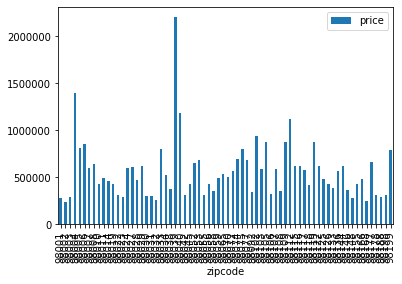

In [87]:
data_set[['zipcode', 'price']].groupby('zipcode').mean().plot.bar()

In [77]:
data_set.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [63]:
list_of_cols = list(data_set.columns)
list_of_cols.remove('id')
list_of_cols

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [33]:
data_set.zipcode.value_counts(); # 70 zipcodes in this area

In [29]:
data_set.sort_values(by = ['zipcode']) #inplace = True #maybe do this later?

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10725,1311300100,20150115T000000,221000.0,3,1.00,1250,7280,1.0,0,0,...,7,1250,0,1965,0,98001,47.3414,-122.286,1450,7350
9791,3751603173,20140604T000000,212500.0,3,1.00,920,14400,1.0,0,0,...,7,920,0,1977,0,98001,47.2816,-122.269,1170,9600
4882,8961950410,20140707T000000,328000.0,3,2.00,2250,7904,1.5,0,0,...,8,2250,0,1998,0,98001,47.3165,-122.252,2460,8622
13047,6648760100,20140711T000000,299950.0,3,2.50,1600,9830,2.0,0,0,...,8,1600,0,1993,0,98001,47.3390,-122.266,1890,8910
14661,9262800171,20150324T000000,252000.0,4,1.50,1550,19800,1.0,0,0,...,7,1050,500,1969,0,98001,47.3117,-122.270,1640,22654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,6917700305,20150219T000000,529000.0,2,1.00,1210,7667,1.0,0,0,...,6,900,310,1950,0,98199,47.6571,-122.396,1330,6462
9811,1370801435,20141105T000000,1070000.0,3,1.75,2320,6090,2.0,0,3,...,8,2040,280,1939,0,98199,47.6430,-122.412,3110,7052
6148,1373800170,20140630T000000,972000.0,4,1.75,2010,6300,1.0,0,2,...,8,1610,400,1937,0,98199,47.6457,-122.412,3290,6300
11879,1370802455,20140813T000000,1050000.0,4,4.50,3180,4606,2.0,0,3,...,9,1990,1190,1929,0,98199,47.6402,-122.405,2110,5323


# longitude latitude min max ; what do i do with this

In [36]:
data_set.lat.max() - data_set.lat.min() # latitude diff

0.621699999999997

In [37]:
data_set.long.max() - data_set.long.min() # longitude diff

1.2040000000000077

In [40]:
data_set.lat.max(), data_set.long.max() # max lat and max long

(47.7776, -121.315)

In [64]:
data_set.lat.min(), data_set.long.min() # min lat and min long

(47.1559, -122.519)